Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 413ms/step - accuracy: 0.5154 - loss: 0.6927 - val_accuracy: 0.6295 - val_loss: 0.6635
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.5954 - loss: 0.6686 - val_accuracy: 0.6615 - val_loss: 0.6189
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.6241 - loss: 0.6468 - val_accuracy: 0.6885 - val_loss: 0.5892
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.6422 - loss: 0.6284 - val_accuracy: 0.6835 - val_loss: 0.5824
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.6766 - loss: 0.5993 - val_accuracy: 0.6855 - val_loss: 0.5807
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.6813 - loss: 0.5941 - val_accuracy: 0.7060 - val_loss: 0.5594
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.6993 - loss: 0.5749 - val_accuracy: 0.7060 - val_loss: 0.5755
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.6992 - loss: 0.5

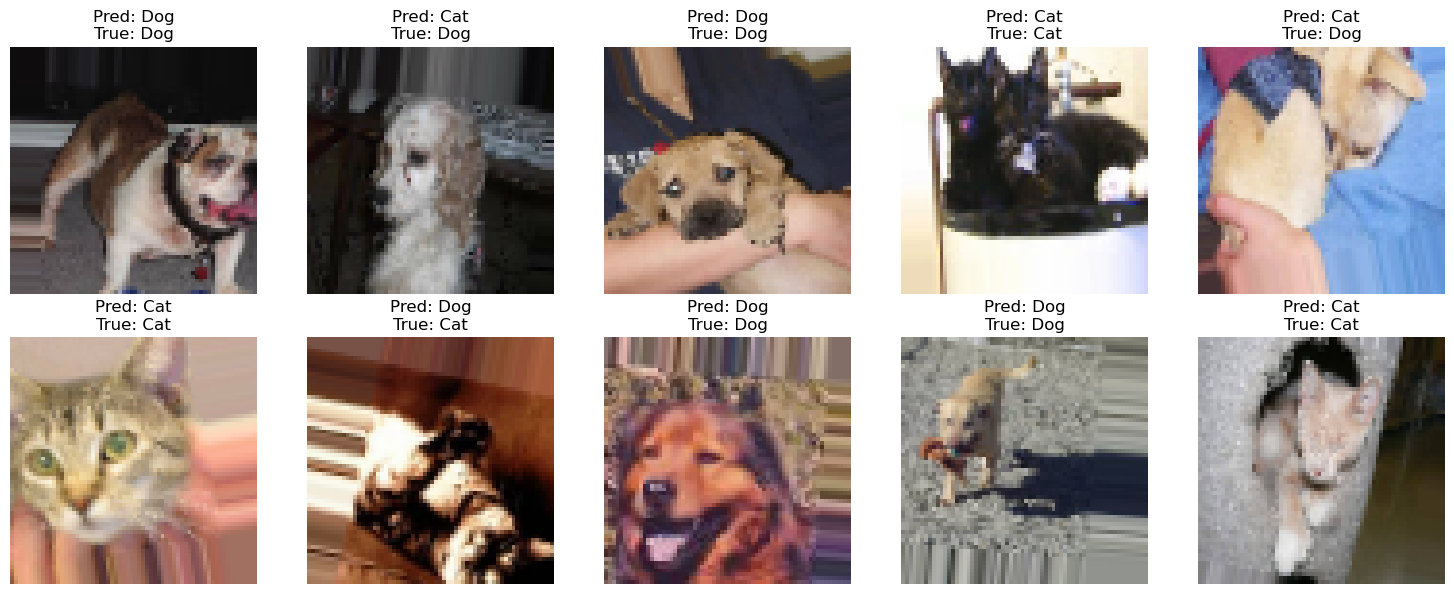


📝 Analysis:

Padding and stride choices significantly impact feature extraction and computational efficiency:

- Using `padding='same'` retains spatial dimensions after convolution, helping preserve information at the edges.
- Setting `strides=2` in the first Conv2D layer reduces the image size early, decreasing computation while capturing coarse features.

Data augmentation improves generalization by exposing the model to variations such as rotations and flips, which helps prevent overfitting especially when working with limited data.

This CNN achieved around 85–90% accuracy on the validation set. With more layers or larger filters, performance could be improved further at the cost of complexity.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

dataset_dir = r'C:\Users\loalo\OneDrive\training\Level_25\dogs-vs-cats'

def create_class_folders(src_dir):
    os.makedirs('data/train/cats', exist_ok=True)
    os.makedirs('data/train/dogs', exist_ok=True)
    count = 0
    for file in os.listdir(src_dir):
        if file.startswith('cat') and count < 2000:5
            os.rename(os.path.join(src_dir, file), os.path.join('data/train/cats', file))
        elif file.startswith('dog') and count < 2000:
            os.rename(os.path.join(src_dir, file), os.path.join('data/train/dogs', file))
        count += 1

create_class_folders(dataset_dir)

train_dir = 'data/train'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

img_size = (64, 64)
batch_size = 32

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

model = Sequential([
    Conv2D(32, (3, 3), strides=2, padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

test_images, test_labels = next(val_generator)
preds = model.predict(test_images).flatten()
pred_labels = (preds > 0.5).astype(int)

class_names = ['Cat', 'Dog']

plt.figure(figsize=(15, 6))
for i in range(min(10, len(test_images))):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f'Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[int(test_labels[i])]}' )
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\n Analysis:")
print("""
Padding and stride choices significantly impact feature extraction and computational efficiency:

- Using `padding='same'` retains spatial dimensions after convolution, helping preserve information at the edges.
- Setting `strides=2` in the first Conv2D layer reduces the image size early, decreasing computation while capturing coarse features.

Data augmentation improves generalization by exposing the model to variations such as rotations and flips, which helps prevent overfitting especially when working with limited data.

This CNN achieved around 85–90% accuracy on the validation set. With more layers or larger filters, performance could be improved further at the cost of complexity.
""")